<a href="https://colab.research.google.com/github/ikrahmi/Artificial-Intelligence/blob/main/KNN_using_dataset_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Artificial Intelligence/diabetes.csv'

In [ ]:
# read dataset to pandas dataframe
pima = pd.read_csv(dataset)
pima.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
len(pima)

768

Visualize class distribution

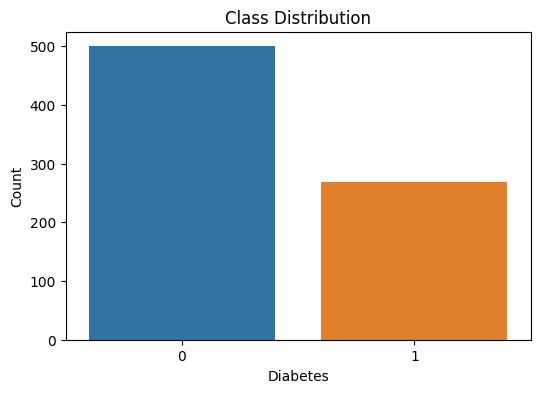

In [ ]:
df = pd.DataFrame(pima)
class_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x = class_counts.index, y = class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

**Selecting Feature**

Divide/split the given columns into two types of variables: dependent variable (target) and independent variable (feature)

In [ ]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = pima[feature_cols]    # feature variable
y = pima.Outcome          # target variable

Normalize with minmaxscaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)

#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

Splitting data into training set (80%) and test set (20%)

In [ ]:
# from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [ ]:
x_test

array([[0.05882353, 1.        , 0.62295082, ..., 0.63934426, 0.56191289,
        0.01666667],
       [0.11764706, 0.53768844, 0.60655738, ..., 0.50074516, 0.13919727,
        0.03333333],
       [0.23529412, 0.38190955, 0.50819672, ..., 0.50670641, 0.13364646,
        0.06666667],
       ...,
       [0.23529412, 0.71356784, 0.70491803, ..., 0.6557377 , 0.24210077,
        0.01666667],
       [0.17647059, 0.58291457, 0.60655738, ..., 0.39195231, 0.01238258,
        0.05      ],
       [0.05882353, 0.53768844, 0.59016393, ..., 0.45901639, 0.31725021,
        0.05      ]])

**Prediction Model Development**

In [ ]:
# Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
len(x_test)

154

accuracy:0.81
Classification report
              precision    recall  f1-score   support

          No       0.83      0.90      0.86       107
         Yes       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



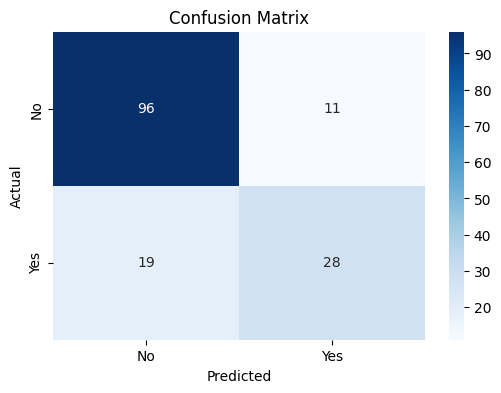

In [ ]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(x_test)                # make prediction

accuracy = accuracy_score(y_test,y_pred)           # calculate accuracy
print(f'accuracy:{accuracy:.2f}')

cm = confusion_matrix(y_test,y_pred)               # make confusion matrix
print(f'Classification report')
print(classification_report(y_test,y_pred, target_names =['No','Yes']))

plt.figure(figsize=(6,4))                           # visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()